### Time series forecasting with ARIMA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
f_birth=pd.read_csv('daily-total-female-births-CA.csv',parse_dates=[0],index_col=[0])

In [5]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [6]:
f_birth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [7]:
type(f_birth)

pandas.core.frame.DataFrame

In [8]:
series_value=f_birth.values

In [9]:
type(series_value)

numpy.ndarray

In [10]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


### Checking for missing values

In [11]:
f_birth.isnull().sum()

births    0
dtype: int64

In [12]:
f_birth['births'].isnull().sum()

0

### Checking for outliers

In [13]:
import seaborn as sns

<Axes: xlabel='births'>

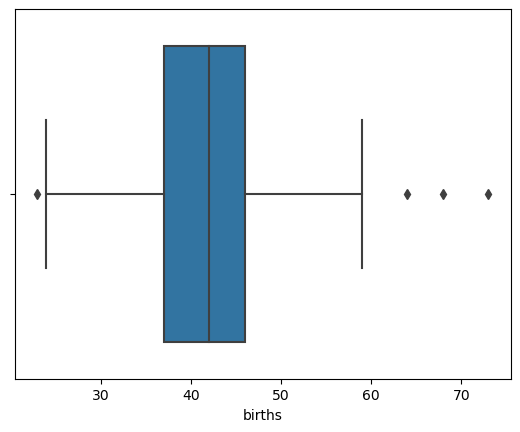

In [14]:
sns.boxplot(x=f_birth['births'])

### Checking vizualtion for time series

<Axes: xlabel='date'>

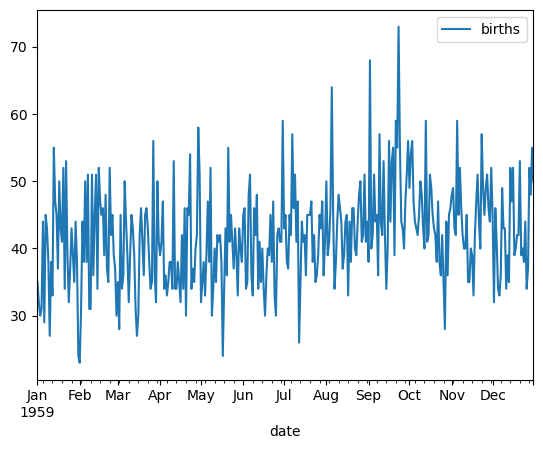

In [15]:
f_birth.plot()

In [16]:
# so this is stationary time series where there is no trend
# it is hard to get clarity about this time series for that we need to do smoothing
# we'll do smoothing by moving averages(it will remove flactuations)

In [17]:
f_birth_mean=f_birth.rolling(window=10).mean()

<Axes: xlabel='date'>

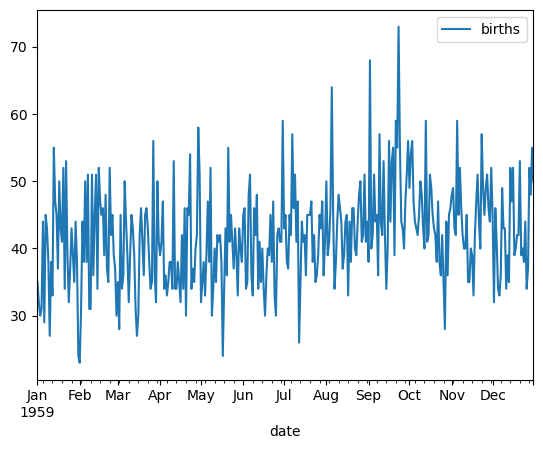

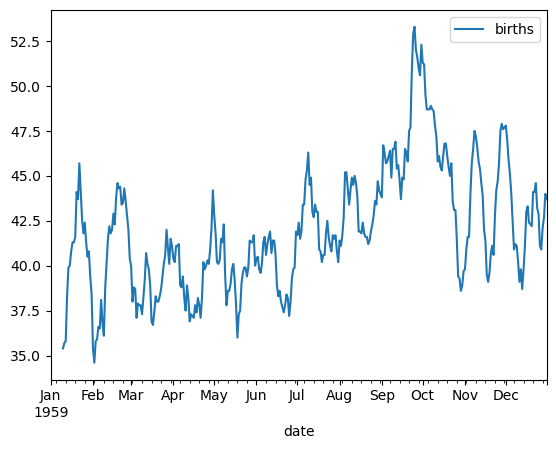

In [18]:
f_birth.plot()
f_birth_mean.plot()

### Now we have to create Base Line model

In [19]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [20]:
value=pd.DataFrame(series_value)

In [21]:
birth_df=pd.concat([value,value.shift(1)],axis=1)

In [22]:
birth_df.head(5)

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [23]:
birth_df.columns=['Actual_Birth','Forcasting_Birth']

In [24]:
birth_df.head(3)

,Actual_Birth,Forcasting_Birth
0,35,NaN
1,32,35.0
2,30,32.0


### Model Evaluation

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [26]:
birth_test=birth_df[1:]

In [27]:
birth_test.head(4)

,Actual_Birth,Forcasting_Birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [28]:
birth_error=mean_squared_error(birth_test.Actual_Birth,birth_test.Forcasting_Birth)

In [29]:
birth_error

84.22252747252747

In [30]:
np.sqrt(birth_error)

9.177283229394606

In [31]:
# auto regressive represent today value is correlated with previous value--> p--ACf

# moving avarage is nothing but smoothing part where we remove the error-->q-->PACF

# integreted is nothing but order of difference-->d

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

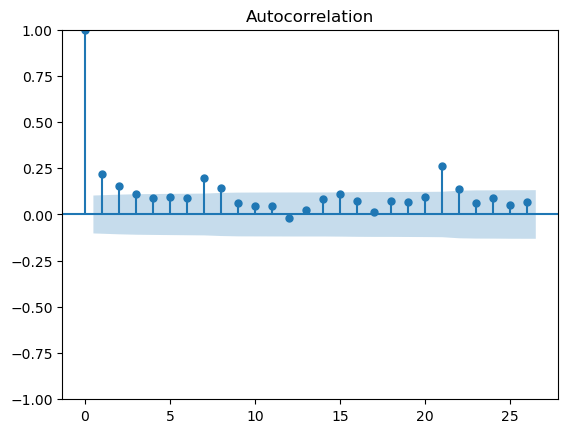

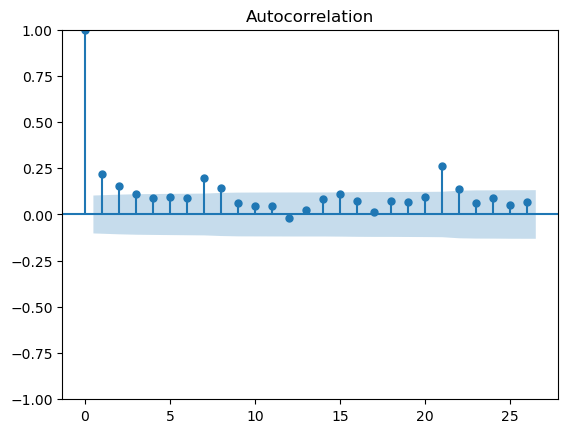

In [33]:
#plot acf is to identify the parameter q

plot_acf(f_birth)

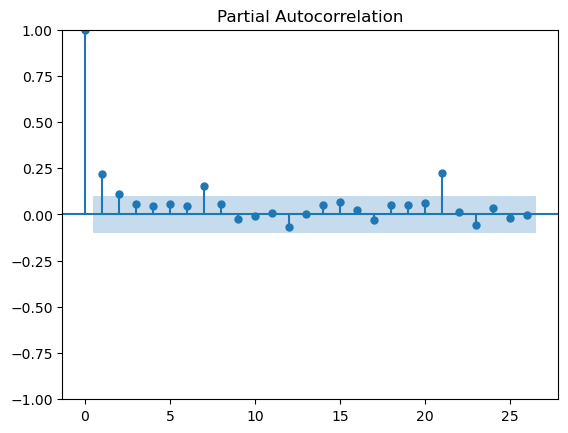

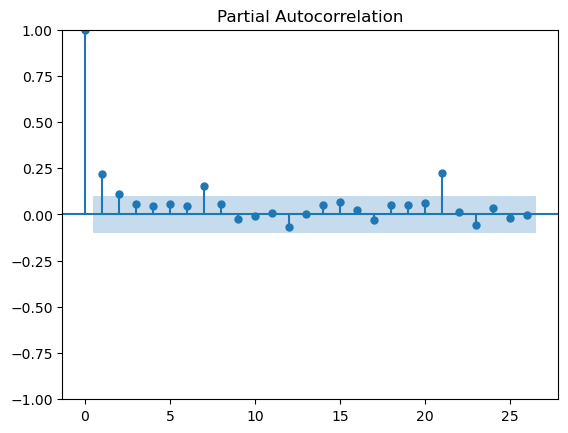

In [34]:
# plot pacf is to identify the value of p

plot_pacf(f_birth)

In [35]:
# p-->3   q-->3,4  and d--> 0 (since time series is stationary)

### train-test split

In [36]:
train_df=f_birth[:292]
test_df=f_birth[292:]

In [37]:
train_df.shape

(292, 1)

In [38]:
test_df.shape

(73, 1)

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
birth_model=ARIMA(train_df,order=(2,1,3))

C:\Users\milind.mali\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\milind.mali\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\milind.mali\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [41]:
birth_model_fit=birth_model.fit()

C:\Users\milind.mali\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
birth_model_fit.aic

1977.216488031641

In [43]:
# lower the aic value better will be the model will be

In [44]:
birth_forecast=birth_model_fit.forecast(steps=73)

In [45]:
birth_forecast

1959-10-20    48.858616
1959-10-21    48.427611
1959-10-22    44.218925
1959-10-23    46.855950
1959-10-24    49.432962
                ...    
1959-12-27    47.147843
1959-12-28    47.134541
1959-12-29    46.519562
1959-12-30    46.857977
1959-12-31    47.259390
Freq: D, Name: predicted_mean, Length: 73, dtype: float64

In [46]:
type(birth_forecast)

pandas.core.series.Series

In [47]:
test_df

,births
date,
1959-10-20,42
1959-10-21,38
1959-10-22,47
1959-10-23,38
1959-10-24,36
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [48]:
np.sqrt(mean_squared_error(test_df,birth_forecast))

7.645964013662924